# Random Forest Example

> November 25, 2022

In [2]:
'''
Suppose we have a dataset of irish flower. 
1. Data Pre-processing step
2. Fitting decision tree algorithm to the Training set
3. Predicting the test result
4. Test accuracy of the result(Creation of Confusion matrix)
5. Visualizing the test set result.
'''
# importing necessary Python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# download the iris dataset
iris_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# assign column names to the dataset
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# read dataset to pandas dataframe
dataset = pd.read_csv(iris_path, names = headernames)
dataset.head(20)

# Statistical Summary: descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
# Class Distribution
print(dataset.groupby('Class').size())
print(dataset.groupby('sepal-width').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64
sepal-width
2.0     1
2.2     3
2.3     4
2.4     3
2.5     8
2.6     5
2.7     9
2.8    14
2.9    10
3.0    26
3.1    12
3.2    13
3.3     6
3.4    12
3.5     6
3.6     3
3.7     3
3.8     6
3.9     2
4.0     1
4.1     1
4.2     1
4.4     1
dtype: int64


In [5]:
# Reviewing Skew of Attribute Distribution:
# Skewness may be defined as the distribution that is assumed to be Gaussian but appears distorted or shifted in one direction or another, or either to the left or right.
# Presence of skewness in data requires the correction at data preparation stage so that we can get more accuracy from our model.

# Most of the ML algorithms assumes that data has a Gaussian distribution i.e. either normal of bell curved data.
# From the above output, positive or negative skew can be observed. If the value is closer to zero, then it shows less skew.
print(dataset.skew())

sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
dtype: float64


/var/folders/fd/1mv0d7g16sx55cwb0hmjv94c0000gn/T/ipykernel_85445/1026187208.py:7: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset.skew())


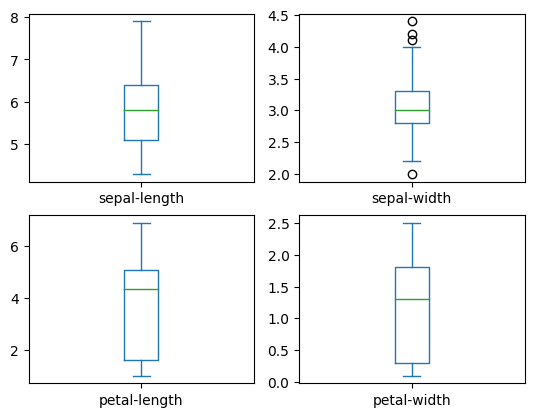

In [6]:
# Data Visualization
# .1 Univariate (one variable):
# box and whisker plots

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

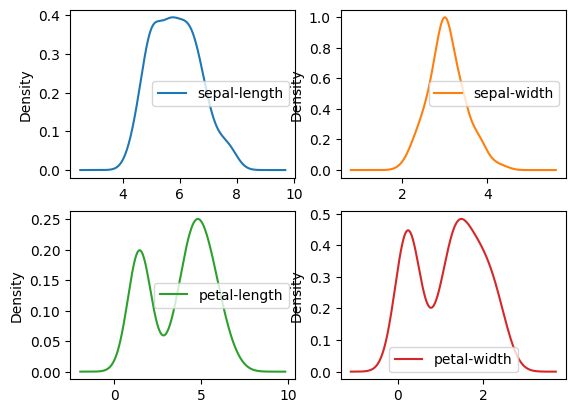

In [7]:
# density plots
dataset.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()

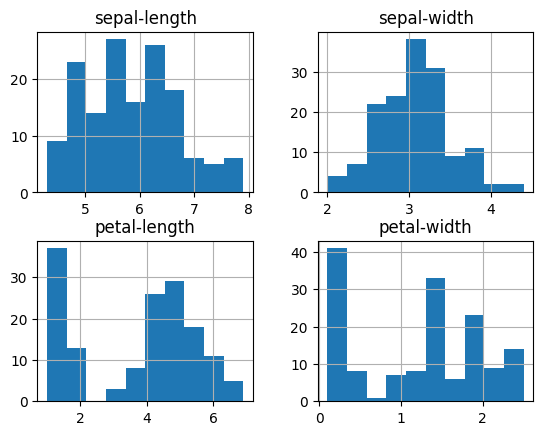

In [8]:
# histograms
dataset.hist()
plt.show()

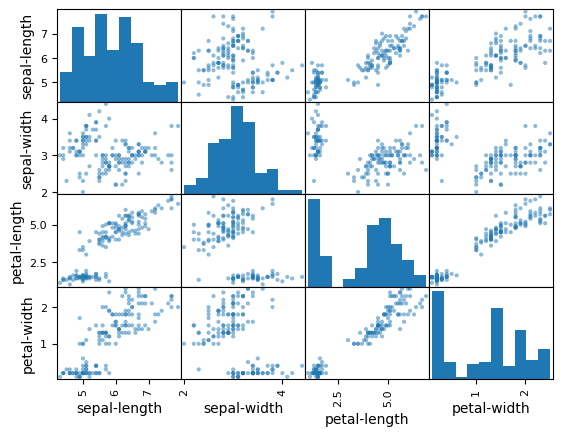

In [9]:
# .2 Multivariate Plots: scatter plot matrix
# scatter matrix plot
from pandas.plotting import scatter_matrix

scatter_matrix(dataset)
plt.show()

In [10]:
# Correlation matrix plot
# Correlation between Attributes using Pearson's Correlation Coefficient:
# Coefficient value = 1 − It represents full positive correlation between variables.
# Coefficient value = -1 − It represents full negative correlation between variables.
# Coefficient value = 0 − It represents no correlation at all between variables.

pd.set_option('display.width', 100)
pd.set_option('precision', 2)
correlations = dataset.corr(method='pearson')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(headernames)
ax.set_yticklabels(headernames)
plt.show()

OptionError: Pattern matched multiple keys

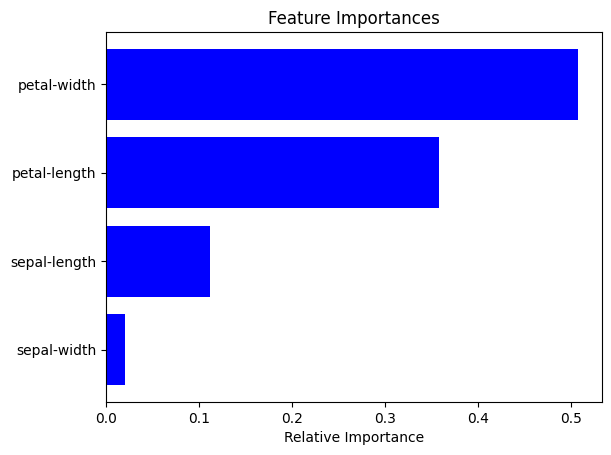

In [11]:
# Data Preprocessing
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values
array = dataset.values
X = array[:,0:4]
y = array[:,4]
# divide the data into train and test split. The following code will split the dataset into 70% training data and 30% of testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# train the model with the help of RandomForestClassifier class of sklearn
from sklearn.ensemble import RandomForestClassifier

# n_estimators: the number of trees in the forest. The larger the better, but also the longer it will take to compute.
# max_features: the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias.

clf_iris = RandomForestClassifier(n_estimators = 50)#, criterion='gini', max_depth=4, random_state=0, max_features=None)
clf_iris.fit(X_train, y_train)

features = dataset.columns[0:4]

importances = clf_iris.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [12]:
# make prediction
y_pred = clf_iris.predict(X_test)

# print the results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[14  0  0]
 [ 0 17  0]
 [ 0  4 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.81      1.00      0.89        17
 Iris-virginica       1.00      0.71      0.83        14

       accuracy                           0.91        45
      macro avg       0.94      0.90      0.91        45
   weighted avg       0.93      0.91      0.91        45

Accuracy: 0.9111111111111111
